<a href="https://colab.research.google.com/github/kobestenson/COMPPHYS/blob/main/Kobe_Stenson_Lab07_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 07: Numerical Integration

* There are many techniques for implementing numerical integration.  In this lab, you will write code to implement the trapezoid method of integration.

* You will use this function to calculate the integral in several different physical situations.

* You will compare your function with python's built-it numerical integrators.

In [ ]:
# import your modules here
import numpy as np
import matplotlib.pyplot as plt


# Part 1: Write a Function to Implement the Trapezoid Integration Method

(5 points)

Write a function called **trap** that does the following.

Input:
* array of y values
* array of x values, spanning from from xmin to xmax


Function should integrate using the trapezoid method.

Return:
* the integral of $f(x)$ between xmin and xmax

In [ ]:
# write your function here
def trap(x,y):
  area = 0
  for i in range(1,len(x)):
    trapezoid_area = 0.5*(y[i]+y[i-1])*(x[i]-x[i-1])
    area += trapezoid_area
  return area


# Part 2:  Calculate the Area Under the Half Circle

(10 points)

In the pre-lab assignment, we estimated the area of a half circle using the trapezoid method.

The general equation for a circle is:

$$ r^2 = x^2 + y^2 $$

For a circle of $r=2$, we can solve for the y coordinate:

$$ f(x) = y = \sqrt{2^2 - x^2} $$.


### Write a function to return the y values of your circle

* In the first cell below, write a function called **mycircle** that returns the y value of the circle.

* let the radius be an optional argument, and set the default value to $r=2$.






In [ ]:
# write your function mycircle here
def mycircle(x,r=2):
  y = np.sqrt(r**2 - x**2)
  return y



### Calculate the area under the half circle using integration

* In the next cell, set up an array of x values with $-2 \le x \le 2$, with 100 divisions between $-2$ and $2$.  
* Calculate the corresponding y values using your **mycircle** function.

* Then use your **trap** function to calculate the area under the circle.

* Print the value of your area using a formatted print statement.  Print five decimal places.

In [ ]:
x_values = np.linspace(-2,2,100)
y_values = mycircle(x_values,2)

circle_area = trap(x_values,y_values)
print(f'The area under the circle is {circle_area:.5f}')

The area under the circle is 6.27644


### Determine the Accuracy of Your Integral

* Compare your answer with the accepted value of the integral.

* Calculate and print your percent error.

In [ ]:
known = 0.5*np.pi*(2**2)
perc_error = (known - circle_area)/(known)*100
print(f'{perc_error:.2f}')

0.11


### The impact of the spacing in the x array

* Repeat your above calculations, but divide the region $-2 \le x \le 2$ into 1000 steps.

* You can copy all of the necessary code into one cell to simplify your calculation.

* **SUMMARY**: describe how the accuracy of your integral changes as the size of the steps in the x direction decreases?

**YOUR ANSWER HERE**



In [ ]:
x2_values = np.linspace(-2,2,1000)
y2_values = mycircle(x2_values,2)

circle_area2 = trap(x2_values,y2_values)
print(f'The area under the circle is {circle_area2:.5f}')

perc_error2 = (known - circle_area2)/(known)*100
print(f'{perc_error2:.2f}')

The area under the circle is 6.28297
0.00


# Part 3: Integral of the Gaussian Distribution

(10 points)

The gaussian function (aka normal distribution) is:
$$  f(x) = \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}\left(\frac{x-\bar{x}}{\sigma}\right)^2} $$

where:
* $\bar{x}$ is the average of a distribution
* $\sigma$ is the standard deviation of the distribution


Write a function **mygauss** that does the following:

* Input
  * x
  * mean
  * sigma

* calculate $f(x)$

* Return
  * $f(x)$




In [ ]:
def mygauss(x,mean,sigma):
  gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mean)/sigma)**2)
  return gauss

### Integrate your gaussian

* write code to integrate the gaussian between:
* $ -\sigma \le x \le \sigma $

* Compare your results with the expected answer, and calculate your percent error.

* If you are not sure what the expected answer is, [look here](https://en.wikipedia.org/wiki/Normal_distribution)

In [ ]:
sigma = 1
mean = 0

In [ ]:
int_gauss = np.linspace(-1,1,100)
y_gauss = mygauss(int_gauss,mean,sigma)

area_gauss = trap(int_gauss,y_gauss)
print(f'{area_gauss:.5f}')

known2 = 0.682
perc_error3 = np.absolute(known2 - area_gauss)/(known2)*100
print(f'{perc_error3:.2f}')

0.68267
0.10


Calculate the integral for:
* $ -2\sigma \le x \le 2\sigma $

and compare with the accepted answer.

In [ ]:
int_gauss2 = np.linspace(-2*sigma,2*sigma,100)
y_gauss2 = mygauss(int_gauss2,mean,sigma)

area_gauss2 = trap(int_gauss2,y_gauss2)
print(f'{area_gauss2:.5f}')

known3 = 2*(0.136+0.341)
perc_error4 = np.absolute(known3 - area_gauss2)/(known3)*100
print(f'{perc_error4:.2f}')

0.95447
0.05


Calculate the integral for:
* $ -3\sigma \le x \le 3\sigma $

and compare with the accepted answer.

In [ ]:
int_gauss3 = np.linspace(-3*sigma,3*sigma,100)
y_gauss3 = mygauss(int_gauss3,mean,sigma)

area_gauss3 = trap(int_gauss3,y_gauss3)
print(f'{area_gauss3:.5f}')

known4 = 2*(0.021+0.136+0.341)
perc_error5 = np.absolute(known4 - area_gauss3)/(known4)*100
print(f'{perc_error5:.2f}')

0.99729
0.13


# Part 4: Using Python Built-In Functions
(5 points)

* Let's revisit parts 1 and 4 and use python's built-in functions to complete the integration.

* You can use the ```scipy.integrate.trapezoid``` function to perform your integration.

In [ ]:
# import scipy.integrate.trapezoid
from scipy.integrate import trapz
# set up x and y arrays for the half circle
x_values = np.linspace(-2,2,100)
y_values = mycircle(x_values,2)

# call scipy.integrate.trapezoid to perform the integration
new_trap = np.trapz(y_values,x_values)
# print your result and the expected answer in a formatted print statement
print(f'Our result is {new_trap:.2f} and the expected answer is {circle_area:.2f}')

Our result is 6.28 and the expected answer is 6.28


In [ ]:
# import scipy.integrate.trapezoid
sigma = 1
mean = 0
# set up x and y arrays for the gaussian
int_gauss = np.linspace(-1,1,100)
y_gauss = mygauss(int_gauss,mean,sigma)
# call scipy.integrate.trapezoid to perform the integration between $-1\sigma \le x \le 1\sigma$.
new_gauss_trap = np.trapz(y_gauss,int_gauss)
# print your result and the expected answer in a formatted print statement
print(f'Our result is {new_gauss_trap:.2f} and the expected answer is {area_gauss:.2f}')

Our result is 0.68 and the expected answer is 0.68


# Part 5: Calculating Area Using Monte Carlo

(10 points)

* On paper or the whiteboard, develop pseudo code for a function that will calculate the area of the half circle using the Monte Carlo method.
* Check this with your instructor, and discuss how you could generalize this for any function.
* Write your function **mcintegrate** in the cell below.
* Your function should have an optional input argument, **visualize**, with a default value of ```False```.  If ```visualize=True```, your function should create a plot that shows:
  * the function being integrated with a black solid line;
  * the points that fall below the function as blue circles;
  * the points that fall above the function as red circles;
  * a title that reports the area.



In [ ]:
# your monte carlo function here
def mcintegrate(radius=1,num=1000,visualize=False):
  xrandom = np.random.uniform(-radius,radius,num)
  yrandom = np.random.uniform(0,radius,num)

  below = yrandom <= mycircle(xrandom,radius)
  above = yrandom > mycircle(xrandom,radius)

  circ_area = np.sum(below)/num * (2*radius**2)

  if visualize == True:
    plt.figure(figsize=(12,8))

    x = np.linspace(-radius,radius,100)
    plt.plot(x,mycircle(x),'k-',label='Half Circle')

    plt.scatter(xrandom[below],yrandom[below],color='blue',label='point below')
    plt.scatter(xrandom[above],yrandom[above],color='red',label='point above')

  return circ_area


### Running Your Monte Carlo Integration Function

* Use your function for integrating the area under the curve in Part 1.
* Set ```visualize=True``` to see make sure your function is behaving as expected.

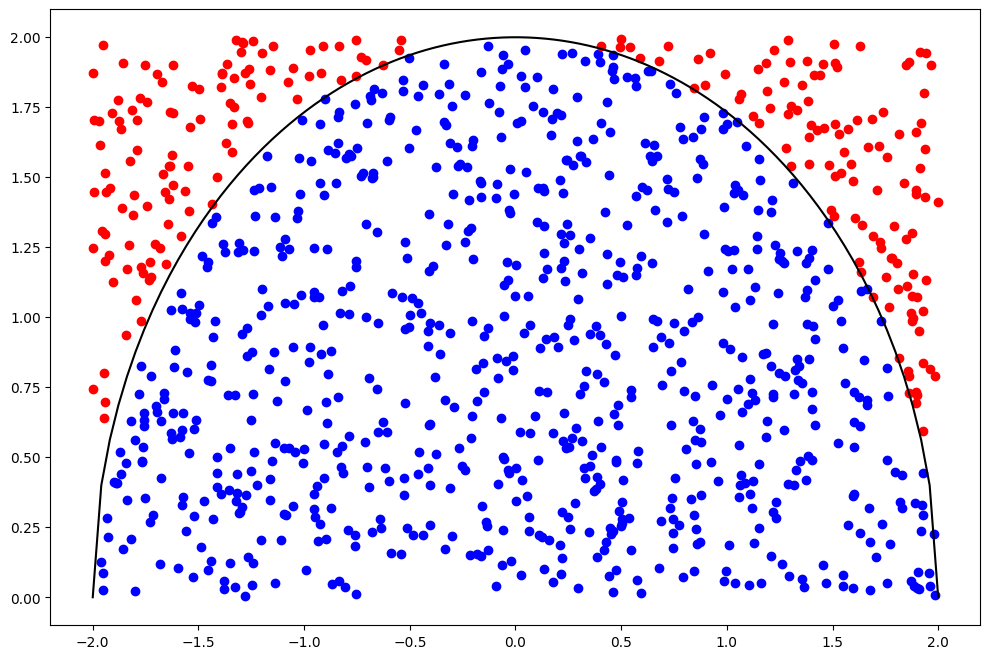

In [ ]:
# your code to calculate the area of a half circle using monte carlo
xdist = np.linspace(-2,2,100)
ydist = mycircle(xdist)

areadist = trap(xdist,ydist)
myint = mcintegrate(2,visualize=True)